## Course Announcements

- **Week 1**: weekly quz due *this* Friday (1/17, 11:59 PM) 
- **A1** due *next* Friday (1/24, 11:59 PM)

# Data in Python


- data files in Python
    - semi-structured files
    - Web Scraping & APIs
- wrangling data 
    - `pandas`
    - common manipulations
- Where to find data?

## Setup

In [1]:
# Import standard libraries
%matplotlib inline
import pandas as pd
import numpy as np

## Data 'Friendliness'

The degree to which a data filetype easily lends itself to useful analysis.

## 'Friendly' File Types:

- csv
- tsv
- json
- txt
- xml

## 'Unfriendly' File Types:
- pdf
- docx
- html
- Anything made to look nice for humans

### CSV Files

- 'Comma Separated Value' files store data, separated by comma's. 
- Think of them like lists.

In [2]:
# Note: through this notebook, I will be using '!' to run the shell command 'cat'
#  to print out the content of example data files

!cat data/dat.csv

1, 2, 3, 4
5, 6, 7, 8
9, 10, 11, 12

In [3]:
# Python has a module devoted to working with csv's
import csv

In [ ]:
# We can read through our file with the csv module
with open('data/dat.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    for row in csv_reader:
        print(', '.join(row))

In [5]:
# Pandas also has functions to directly load csv data
pd.read_csv?

In [6]:
# Let's read in our csv file
pd.read_csv('data/dat.csv', header=None) 

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


## iclicker Question #1

What does `pd` in `pd.read_csv()` specify?

- A) it's the name of the function
- B) that the `read_csv` method is from the pd package
- C) that the `read_csv` method is from the pandas package (we're using the shortcut `pd`)
- D) to read a csv file into python
- E) I'm super lost

### JSON

- JavaScript Object Notation files can store hierachical key/value pairings. 
- Think of them like dictionaries.

In [7]:
!cat data/dat.json

{
  "firstName": "John",
  "age": 53
}


In [8]:
# Think of json's as similar to dictionaries
d = {'firstName': 'John', 'age': '53'}
print(type(d),'\n',d)

<class 'dict'> 
 {'firstName': 'John', 'age': '53'}


In [9]:
# Python also has a module for dealing with json
import json

In [10]:
# Load a json file
with open('data/dat.json') as dat_file:    
    dat = json.load(dat_file)

In [11]:
# Check what data type this gets loaded as
print(type(dat))

<class 'dict'>


In [12]:
# Pandas also has support for reading in json files
pd.read_json?

In [13]:
# You can read in json formatted strings with pandas
pd.read_json('{ "first": "Alan", "place": "Manchester"}', typ = 'series')

first          Alan
place    Manchester
dtype: object

In [14]:
# Read in our json file with pandas
pd.read_json('data/dat.json', typ = 'series')

firstName    John
age            53
dtype: object

### XML

- eXtensible Markup Language files store 'tagged' data. 
- Think of them like HTML.

In [15]:
!cat data/dat.xml

<person>
	<who>Claude</who>
	<what>Info</who>
	<when>50s</when>
</person>

In [16]:
# We can read in the XML file with standard python I/O
with open('data/dat.xml') as dat_file:
    dat = dat_file.read()

In [17]:
# Check out the data
dat

'<person>\n\t<who>Claude</who>\n\t<what>Info</who>\n\t<when>50s</when>\n</person>'

In [18]:
# Beautiful Soup has functions to 'clean up' XML into human-friendlier formats
from bs4 import BeautifulSoup
nice_dat = BeautifulSoup(dat, 'xml')

In [19]:
# Check out the parsed data
print(nice_dat)

<?xml version="1.0" encoding="utf-8"?>
<person>
<who>Claude</who>
<what>Info</what>
<when>50s</when>
</person>


<center>
<img src="img/pandas.png" alt="pandas" width="600px">
</center>

Pandas is Python library for managing heterogenous data.

At it's core, Pandas is used for the **DataFrame** object, which is:
- a data structure for labeled rows and columns of data
- associated methods and utilities for working with data.
- each column contains a `pandas` **Series**

## Loading Data

In [20]:
# Load a csv file of data
df = pd.read_csv('data/my_data.csv')

In [21]:
# Check out a few rows of the dataframe
df.head()

,id,first_name,last_name,age,score,value
0,295,Andrea,Clark,46,-1,24547.87
1,620,Bill,Woods,46,492,46713.90
2,891,Alexander,Jacobson,48,489,32071.74
3,914,Derrick,Bradley,52,-1,30650.48
4,1736,Allison,Thomas,44,-1,9553.12


Pandas DataFrame:
- Index for each row
- Column name for each column
- Stores heterogenous types

## Indexing

In [22]:
# Indexing: select a column using its name
df['last_name']

0          Clark
1          Woods
2       Jacobson
3        Bradley
4         Thomas
5       Williams
6           Wood
7         Garcia
8        Coleman
9         Atkins
10       Johnson
11        Barnes
12        Prince
13       Mcmahon
14         Jones
15         Weber
16         Clark
17          Wood
18       Sanchez
19         Adams
20      Williams
21       Blevins
22           Key
23        Palmer
24         Jones
25        Ibarra
26       Walters
27       Simpson
28      Santiago
29          Mann
         ...    
170        Dixon
171       Miller
172     Matthews
173       Brooks
174    Wilkinson
175        Sharp
176     Thompson
177        Woods
178       Morgan
179      Stewart
180      Gardner
181         Webb
182       Martin
183       Brooks
184       Garcia
185        Marks
186       Fields
187       Adkins
188        Reyes
189      Andrews
190    Dominguez
191       Oliver
192      Bentley
193     Phillips
194       Austin
195        Ortiz
196     Chambers
197        Pit

In [23]:
type(df['last_name'])

pandas.core.series.Series

In [24]:
# Indexing: select a row & column with 'loc'
df.loc[10, 'score']

500

## iclicker Question #2

What would be the output of `df['age'] > 10`?

- A) subset of `df` including only rows of individuals older than 10
- B) a Boolean with `True` for rows where age is greater than 10 and `False` otherwise
- C) `id`s of rows where observations are greater than 10 
- D) an error
- E) I'm super lost

In [27]:
## YOUR CODE HERE
df['age'] > 10

# to get dataframe 
# df[df['age'] > 10]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
170    True
171    True
172    True
173    True
174    True
175    True
176    True
177    True
178    True
179    True
180    True
181    True
182    True
183    True
184    True
185    True
186    True
187    True
188    True
189    True
190    True
191    True
192    True
193    True
194    True
195    True
196    True
197    True
198    True
199    True
Name: age, Length: 200, dtype: bool

## Checking out the DataFrame

In [28]:
# Check how large our dataframe is
df.shape

(200, 6)

In [30]:
# Check what columns we have in our DataFrame
df.columns

Index(['id', 'first_name', 'last_name', 'age', 'score', 'value'], dtype='object')

In [33]:
# Check the datatypes of our variables
df.dtypes

id             object
first_name     object
last_name      object
age             int64
score           int64
value         float64
dtype: object

In [32]:
# Set the index to a string (non-numerical) and use it as index (row labels)
df['id'] = df['id'].astype('str')
df = df.set_index(df['id'])
df.head() 

,id,first_name,last_name,age,score,value
id,,,,,,
295,295,Andrea,Clark,46,-1,24547.87
620,620,Bill,Woods,46,492,46713.90
891,891,Alexander,Jacobson,48,489,32071.74
914,914,Derrick,Bradley,52,-1,30650.48
1736,1736,Allison,Thomas,44,-1,9553.12


## Exploring the data

- quantitative (numbers)
- qualitative (categorical)
- basic descriptive statistics

In [34]:
# Checking categorical data
df['first_name'].value_counts()[0:10]

David        6
Michael      5
Charles      4
James        4
Eric         4
John         3
Ashley       3
Brian        3
Jason        3
Elizabeth    3
Name: first_name, dtype: int64

In [35]:
# Check a particular descriptive statistic
df['value'].mean()

28730.336296296293

In [36]:
# Describe a particular column
df['score'].describe()

count    200.000000
mean     416.595000
std      237.176674
min       -1.000000
25%      288.750000
50%      463.500000
75%      596.500000
max      942.000000
Name: score, dtype: float64

In [37]:
# Get descriptive statistics of all numerical columns
df.describe()

,age,score,value
count,200.000000,200.000000,189.000000
mean,46.020000,416.595000,28730.336296
std,10.028582,237.176674,32493.945741
min,14.000000,-1.000000,0.000000
25%,39.000000,288.750000,9593.030000
50%,46.000000,463.500000,17976.510000
75%,53.000000,596.500000,33163.310000
max,69.000000,942.000000,204999.960000


## iclicker Question #3

What's the average (mean) age of the individuals in this dataset?

- A) 14
- B) 46
- C) 28730
- D) NA
- E) I'm super lost/unsure

In [38]:
## YOUR CODE HERE
df['age'].mean()

46.02

## `pandas`: Common Manipulations

You'll want to be *very* familiar with a few common data manipulations when wrangling data, each of which is described below:

Manipulation | Description
-------|------------
**select** | select which columns to include in dataset
**filter** | filter dataset to only include specified rows
**mutate** | add a new column based on values in other columns
**groupby** | group values to apply a function within the specified groups
**summarize** | calculate specified summary metric of a specified variable
**arrange** | sort rows ascending or descending order of a specified column
**merge** | join separate datasets into a single dataset based on a common column



## Selecting & Dropping Columns

- include subset of columns of larger data frame

In [39]:
df.head()

,id,first_name,last_name,age,score,value
id,,,,,,
295,295,Andrea,Clark,46,-1,24547.87
620,620,Bill,Woods,46,492,46713.90
891,891,Alexander,Jacobson,48,489,32071.74
914,914,Derrick,Bradley,52,-1,30650.48
1736,1736,Allison,Thomas,44,-1,9553.12


In [40]:
# specify which columns to include
select_df = df[['id', 'age', 'score', 'value']]
select_df.head()

,id,age,score,value
id,,,,
295,295,46,-1,24547.87
620,620,46,492,46713.90
891,891,48,489,32071.74
914,914,52,-1,30650.48
1736,1736,44,-1,9553.12


In [41]:
# Drop columns we don't want
df = df.drop(labels=['first_name', 'last_name'], axis=1)

In [42]:
# Check out the DataFrame after dropping some columns
df.head()

,id,age,score,value
id,,,,
295,295,46,-1,24547.87
620,620,46,492,46713.90
891,891,48,489,32071.74
914,914,52,-1,30650.48
1736,1736,44,-1,9553.12


## Filtering Data (slicing)

- include a subset (slice) of rows from larger data frame

In [43]:
# Check if we have any data from people below the age of 18
sum(df['age'] < 18)

1

In [44]:
# Select only participants who are 18 or older
df = df[df['age'] >= 18]
df.shape

(199, 4)

## Missing Data (NaNs)

In [45]:
# Check for missing values
df['value'].hasnans

True

In [46]:
# Check for null values
sum(df['value'].isnull())

11

In [47]:
# Have a look at the missing values
df[df['value'].isnull()]

,id,age,score,value
id,,,,
10753,10753,58,335,NaN
16263,16263,42,323,NaN
24952,24952,51,399,NaN
26091,26091,44,620,NaN
29566,29566,69,224,NaN
35466,35466,55,483,NaN
42138,42138,28,543,NaN
51723,51723,40,443,NaN
55821,55821,41,709,NaN


## Dealing with Missing Data - NaNs

In [48]:
# Dealing with null values: Drop rows with missing data
df = df.dropna()
df.shape

(188, 4)

## Finding Missing Data - Bad Values

In [49]:
# Check for the properties of specific columns
df['score'].describe()

count    188.000000
mean     414.329787
std      238.923293
min       -1.000000
25%      287.000000
50%      463.500000
75%      589.250000
max      942.000000
Name: score, dtype: float64

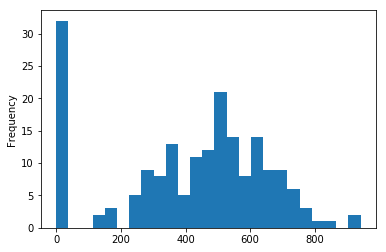

In [51]:
# Check the plot of the data for score to see the distribution
df['score'].plot('hist', bins=25);

## Dealing with Missing Data - Bad Values

In [52]:
# Look for how many values have a -1 value in 'score'
sum(df['score'] == -1)

32

In [53]:
# Drop any row with -1 value in 'score'
df = df[df['score'] != -1]
df.shape

(156, 4)

## Creating new columns (mutating)

- `assign` can be very helpful in adding a new column
- lambda functions can be used to carry out calculations

In [54]:
# convert age in years to age in (approximate) days
df = df.assign(age_days = df['age'] * 365)
df.head()

,id,age,score,value,age_days
id,,,,,
620,620,46,492,46713.90,16790
891,891,48,489,32071.74,17520
2049,2049,57,333,138936.92,20805
2607,2607,50,536,9367.27,18250
2635,2635,68,351,66035.28,24820


## Grouping & summarizing

- group by a particular variable
- calculate summary statistics/metrics within group

In [55]:
# caclculate average within each age
df.groupby('age').agg('mean')

,score,value,age_days
age,,,
23,775.000000,9116.030000,8395.0
27,674.500000,10920.255000,9855.0
28,820.000000,16190.663333,10220.0
29,539.000000,5366.800000,10585.0
31,335.666667,5485.036667,11315.0
32,570.000000,11230.650000,11680.0
33,750.000000,6984.920000,12045.0
34,621.500000,20480.336667,12410.0
35,614.666667,27419.950000,12775.0


## Sorting Rows (arrange)

- specify order in which to display rows

In [56]:
df.head()

,id,age,score,value,age_days
id,,,,,
620,620,46,492,46713.90,16790
891,891,48,489,32071.74,17520
2049,2049,57,333,138936.92,20805
2607,2607,50,536,9367.27,18250
2635,2635,68,351,66035.28,24820


In [57]:
# sort by values in age
df = df.sort_values(by = ['age'])
df.head()

,id,age,score,value,age_days
id,,,,,
81282,81282,23,775,9116.03,8395
70735,70735,27,665,3975.59,9855
15887,15887,27,684,17864.92,9855
96101,96101,28,918,18303.20,10220
60177,60177,28,748,25035.69,10220


## Combining datasets
![](img/join.png)

In [58]:
## Create two DataFrames
left = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value': np.random.randn(4)})    
right = pd.DataFrame({'key': ['B', 'D', 'E', 'F'], 'value': np.random.randn(4)})

In [59]:
left

,key,value
0,A,-0.035785
1,B,0.222361
2,C,-0.760123
3,D,-0.048016


In [60]:
right

,key,value
0,B,0.713750
1,D,1.268733
2,E,0.652800
3,F,1.110714


In [61]:
pd.merge? 

In [62]:
# inner merge by default
pd.merge(left, right, on='key')

,key,value_x,value_y
0,B,0.222361,0.713750
1,D,-0.048016,1.268733


In [63]:
# same as above
pd.merge(left, right, on='key', how='inner')

,key,value_x,value_y
0,B,0.222361,0.713750
1,D,-0.048016,1.268733


In [64]:
# right merge
pd.merge(left, right, on='key', how='right')

,key,value_x,value_y
0,B,0.222361,0.713750
1,D,-0.048016,1.268733
2,E,NaN,0.652800
3,F,NaN,1.110714


In [65]:
# right merge
pd.merge(left, right, on='key', how='left')

,key,value_x,value_y
0,A,-0.035785,NaN
1,B,0.222361,0.713750
2,C,-0.760123,NaN
3,D,-0.048016,1.268733


In [66]:
# outer join
pd.merge(left, right, on='key', how='outer')

,key,value_x,value_y
0,A,-0.035785,NaN
1,B,0.222361,0.713750
2,C,-0.760123,NaN
3,D,-0.048016,1.268733
4,E,NaN,0.652800
5,F,NaN,1.110714


## iclicker Question #4

If table A had 5 rows and table B had 5 rows and 3 of those rows in each table were from the same observations present in the *other* table, how many rows would be present if an **inner merge** were carried out?

- A) 3
- B) 5
- C) 10
- D) 13
- E) Totally unsure

## iclicker Question #5

If table A had 5 rows and table B had 5 rows and 3 of those rows in each table were from the same observations present in the *other* table, how many rows would be present if a **left merge** were carried out?

- A) 3
- B) 5
- C) 10
- D) 13
- E) Totally unsure

## Visualizing Data

- We'll have a whole lecture (or two) on visualization
- For now, we'll just look at one uniquely-pandas approach

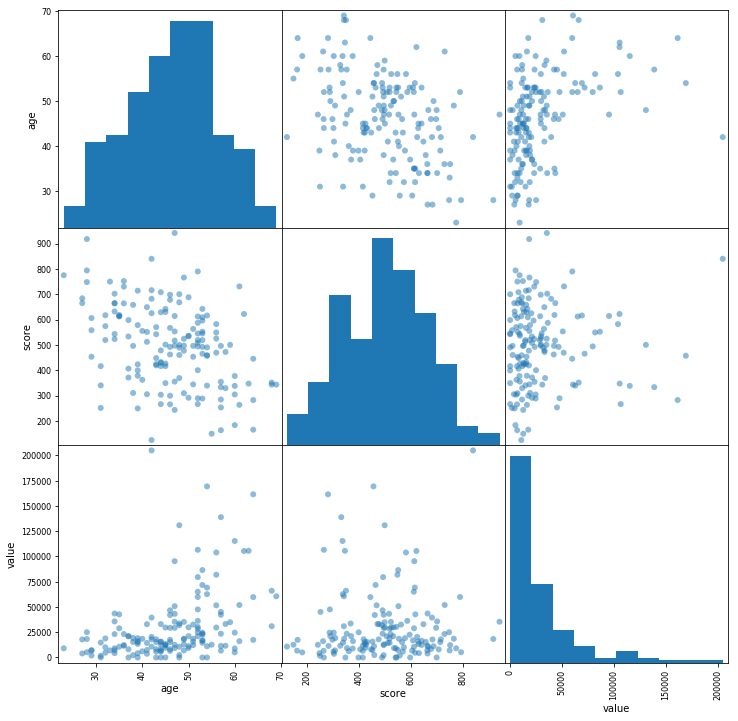

In [67]:
# Plot all numerical columns, and their interactions
pd.plotting.scatter_matrix(df[['age', 'score', 'value']], figsize=[12, 12], marker=12);  

## Check for correlations between variables

In [ ]:
# Take the correlations between all numerical columns
df.corr()

## Application Program Interface (APIs)

- APIs are basically a way for software to talk to software 
    - They are an interface into an application / website / database designed for computers / software.

Notes on APIs:
- Follow API guidelines! 
- These guidelines typically specify the number / rate / size of requests

## Github API

You can access the github api with the following API. Just added specifiers for what you are looking for. 

https://api.github.com/

For example, the following URL will search for the user 'ShanEllis'

https://api.github.com/users/shanellis

<center>
<img src="img/github.png" alt="sql" height="100" width="100">
</center>

## Requesting Web Pages from Python

In [1]:
# The requests module allows you to send URL requests from python
import requests  
from bs4 import BeautifulSoup

In [2]:
# Request data from the Github API on a particular user
page = requests.get('https://api.github.com/users/shanellis')  

In [3]:
# The content we get back is a messily organized json file
page.content

b'{"login":"ShanEllis","id":6606571,"node_id":"MDQ6VXNlcjY2MDY1NzE=","avatar_url":"https://avatars3.githubusercontent.com/u/6606571?v=4","gravatar_id":"","url":"https://api.github.com/users/ShanEllis","html_url":"https://github.com/ShanEllis","followers_url":"https://api.github.com/users/ShanEllis/followers","following_url":"https://api.github.com/users/ShanEllis/following{/other_user}","gists_url":"https://api.github.com/users/ShanEllis/gists{/gist_id}","starred_url":"https://api.github.com/users/ShanEllis/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/ShanEllis/subscriptions","organizations_url":"https://api.github.com/users/ShanEllis/orgs","repos_url":"https://api.github.com/users/ShanEllis/repos","events_url":"https://api.github.com/users/ShanEllis/events{/privacy}","received_events_url":"https://api.github.com/users/ShanEllis/received_events","type":"User","site_admin":false,"name":"Shannon Ellis","company":null,"blog":"shanellis.com","location":"San Die

## iclicker Question #6

What type/format of output is this?

- A) CSV
- B) XML
- C) JSON
- D) API
- E) I'm super lost

In [5]:
# We can read in the json data with pandas
import pandas as pd
git_data = pd.read_json(page.content, typ='series')

In [6]:
# Check out the pandas series object full of data
git_data  

login                                                          ShanEllis
id                                                               6606571
node_id                                             MDQ6VXNlcjY2MDY1NzE=
avatar_url             https://avatars3.githubusercontent.com/u/66065...
gravatar_id                                                             
url                               https://api.github.com/users/ShanEllis
html_url                                    https://github.com/ShanEllis
followers_url           https://api.github.com/users/ShanEllis/followers
following_url          https://api.github.com/users/ShanEllis/followi...
gists_url              https://api.github.com/users/ShanEllis/gists{/...
starred_url            https://api.github.com/users/ShanEllis/starred...
subscriptions_url      https://api.github.com/users/ShanEllis/subscri...
organizations_url            https://api.github.com/users/ShanEllis/orgs
repos_url                   https://api.github.com/

### Authorized Access - OAuth

Open Authorization is a protocol to authorize access (of a user / application) to an API.

OAuth provides a secure way to 'log-in' without using account names and passwords. 

It is effectively a set of keys, and passwords you can use to access APIs. 

## Web Scraping vs. APIs

Web scraping and APIs are different approaches:

- APIs are an interface to interact with an application, designed for programmatic use
    - They allow systematic, controlled access to (for example) and applications database
    - They typically return structured (friendly) data 

- Web scraping (typically) involves navigating through the internet, programmatically following an architecture built for humans
    - This can be hard to systematize, being dependent on the idiosyncracies of a web page, at the time you request it
    - This typically returns relatively unstructured data
    - This entails much more wrangling of the data

## Where to Find Data?

* [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets/blob/master/README.rst)
* [Data.gov](https://catalog.data.gov/dataset)
* [Data Is Plural](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0)
* [UCSD Datasets](https://ucsd.libguides.com/data-statistics/home)
* [Datasets | Deep Learning](http://deeplearning.net/datasets/)
* [Stanford | Social Science Data Collection](https://data.stanford.edu/)
* [Eviction Lab (email required)](https://evictionlab.org/get-the-data/)
* [San Diego Data](https://data.sandiego.gov/)
* [US Census](https://www.census.gov/)
* [Open Climate Data](http://openclimatedata.net/)
* [Data and Story Library](https://dasl.datadescription.com/datafiles/)
* [UCSD behavioral mobile data](http://extrasensory.ucsd.edu/)
* [Kaggle](https://www.kaggle.com/)
* [FiveThirtyEight](https://data.fivethirtyeight.com/)
* [data.world](https://data.world/)
* [Free Datasets - R and Data Mining ](http://www.rdatamining.com/resources/data)
* [Data Sources for Cool Data Science Projects](https://blog.thedataincubator.com/2014/10/data-sources-for-cool-data-science-projects-part-1/)

## Notes on Working with Data

### Data Science is Ad-Hoc

- It is part of the job description to put things together that were not designed to go together.
- We do not have universal solutions, but haphazard, idiosyncratic systems, for data collection, storage and analysis.
- Data is everywhere. But relatively little of it was collected *as data*.

### Data Collection, Curation, and Storage are Difficult

- It can be difficult to choose broadly useful standards
- Take time to think about your data, and how you will load, store, organize and save it

### Data is Inherently Noisy

- We live in a messy, noisy, world, with messy, noisy, people, using messy, noisy instruments.
- There is no perfect data. 
    - There is better / or worse data, given the context.

### Different Objectives

- Humans and computers are different.
- We interact with '*data*' in different ways.
- This underlies many aspects of data wrangling
    - The 'friendliness' of data types / files
    - The difference between web scraping and APIs
    - A disconnect between data in the real world, and data we want to use

## So... What to do?

- Think about how your data are stored & its structure?
- Look at your data before you anayze it
    - are there missing values? 
    - outlier values? 
- Are your data trustworthy? 
    - source?
    - how was it generated?

## Specific Recommendations

- Prioritize using well structured, common, open file types
    - Take advantage of existing tools to deal with these files (numpy, pandas, etc.)

- Look into, and then follow, common conventions
    - Minimize custom objects, workflows and data files 
- Look for APIs. Ask if they are available.
    - Acknowledge that web scraping and/or wrangling unstructured data are complex / long tasks

- Think about data flow from the beginning. Organize your data pipeline, consider the 'wrangling' aspects throughout
    - Set yourself up with well organized, labelled approach to your data
    - Think about when and how you might want/need to save out intermediate results.